# Bernstein Vazirani algorithm

We first create an oracle embedding the secret number 14; we can do this in two equivalent ways:
- using `secret_oracle()` function
- writing the oracle from scratch in python

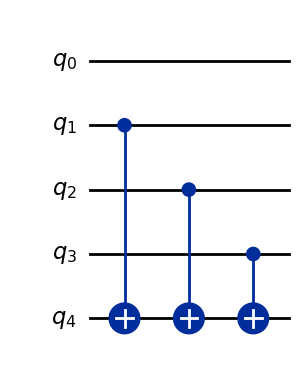

In [3]:
from qlasskit import qlassf, Qint


@qlassf
def oracle(x: Qint[4]) -> bool:
    s = Qint4(14)
    return (x[0] & s[0]) ^ (x[1] & s[1]) ^ (x[2] & s[2]) ^ (x[3] & s[3])


oracle.export("qiskit").draw("mpl")

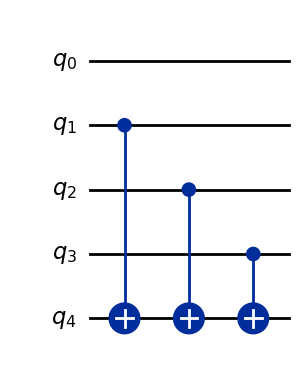

In [4]:
from qlasskit.algorithms import secret_oracle

oracle = secret_oracle(4, 14)
oracle.export("qiskit").draw("mpl")

Now we can use `BernsteinVazirani` to discover the secret embedded in the oracle.

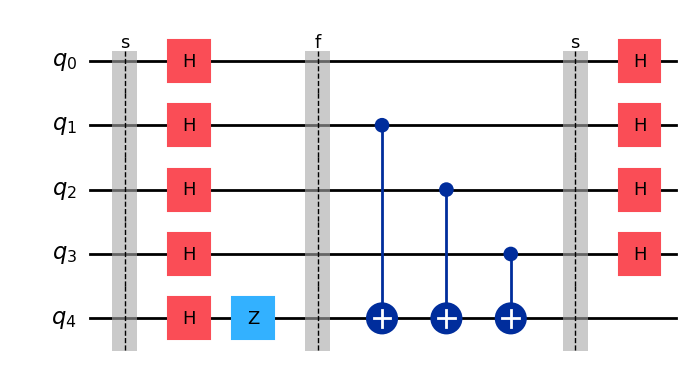

In [6]:
from qlasskit.algorithms import BernsteinVazirani

q_algo = BernsteinVazirani(oracle)
qc = q_algo.export("qiskit")
qc.draw("mpl")

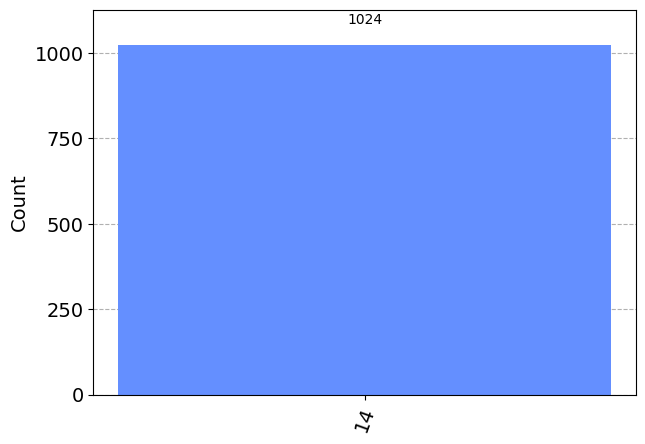

In [8]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

qc.measure_all()
simulator = AerSimulator()
result = simulator.run(qc).result()
counts = result.get_counts(qc)

counts_readable = q_algo.decode_counts(counts)
plot_histogram(counts_readable)